In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import scipy.stats as stats
import scipy.special
#graphing
import matplotlib.pyplot as plt
#stats
import statsmodels.api as sm
from statsmodels.base.model import GenericLikelihoodModel

#import testing
import sys
sys.path.append("../")
import vuong_tests5

In [2]:
class OLS_loglike(GenericLikelihoodModel):
    
    def __init__(self, *args,ols=False, **kwargs):
        super(OLS_loglike,self).__init__(*args,**kwargs)
        self.ols = ols

    def loglikeobs(self, params):
        y = self.endog
        x = self.exog
        mu_y = np.matmul(x,params)  
        resid = y - mu_y
        sigma = np.sqrt(np.sum(resid**2)/resid.shape[0])
        pr_y = stats.norm.logpdf( resid, loc=0,scale=sigma )
        return pr_y

In [3]:
def gen_data(nobs=1000, a=0.25, num_params=4):
    x = np.random.normal(scale=1., size=(nobs,num_params))
    e = np.random.normal(loc=0.0, scale=1.0, size=nobs)
    y = 1 + a*x.sum(axis=1) + e
    return y,x,nobs

In [4]:
def setup_model(yn,xn):
    """setup models for ease"""
    model1 = sm.OLS(yn,sm.add_constant(xn))
    model1_fit = model1.fit(disp=False)
    params1 = (model1_fit.params)
    model1_deriv = OLS_loglike(yn,sm.add_constant(xn))
    ll1 = model1_deriv.loglikeobs(model1_fit.params)
    
    return ll1


def setup_test(yn,xn):
    lls = []
    grads = []
    hesss = []
    params = []                
    for i in range(xn.shape[1]):
        ll = setup_model(yn,xn[:,i])
        lls.append(ll)
    
    return np.array(lls)

def compute_test_stat(lls):
    k = lls.shape[0]
    n = lls.shape[1]
    
    #setup stuff..
    theta = lls.mean(axis=1).reshape((k,1)) 
    V = np.cov(lls)
    
    # linear restrictions
    R = np.identity(k-1)
    R = np.concatenate( (-1*np.ones( (k-1,1) ),R),axis=1 )
    
    #compute the wald statistic
    Rtheta = R.dot(theta)
    RVR_inv = np.linalg.inv(R.dot(V).dot(R.transpose())/n)
    return (Rtheta.transpose()).dot(RVR_inv).dot(Rtheta)[0,0]
    
    
yn,xn,nobs = gen_data()
lls = setup_test(yn,xn)
compute_test_stat(lls)

0.23768819329181448

In [5]:
def plot_true2(gen_data,setup_test,trials=500):
    
    llr_stats = []
    num_params=1
    for i in range(trials):
        yn, xn,nobs = gen_data()
        llrs = setup_test(yn,xn)
        llr = compute_test_stat(llrs)
        llr_stats.append(llr)
        num_params = xn.shape[1]
        
    chi_sq = np.random.normal(loc=0.0, scale=1.0, size=(num_params,1000))
    chi_sq = (chi_sq**2).sum(axis=0)
    
    plt.hist(llr_stats, density=True,bins=15, label="LLR",alpha=.60)
    plt.hist(chi_sq, density=True,bins=15, label=("Chi-sq %s"%num_params),alpha=.60)
    plt.legend()
    plt.show()
    return llr_stats

# K = 4

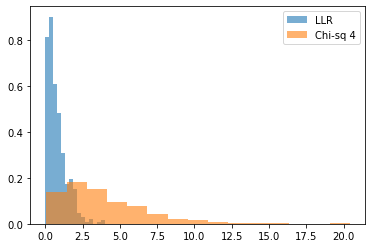

In [6]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=4)
llr_stats = plot_true2(gen_data_ex,setup_test)

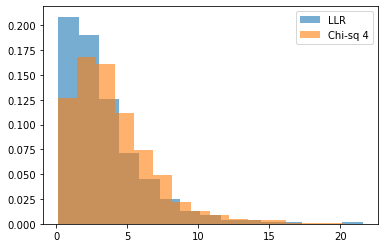

In [7]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=4)
llr_stats = plot_true2(gen_data_ex,setup_test)

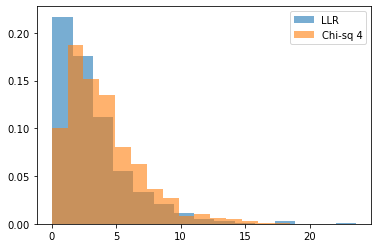

In [8]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=4)
llr_stats = plot_true2(gen_data_ex,setup_test)

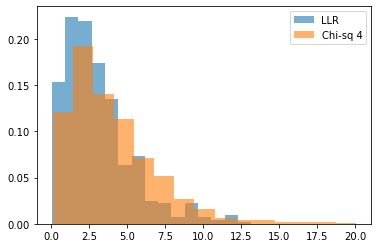

In [9]:
gen_data_ex = lambda : gen_data(nobs=1000, a=1.0, num_params=4)
llr_stats = plot_true2(gen_data_ex,setup_test)

# K = 9

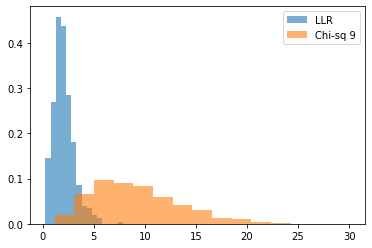

In [10]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=9)
llr_stats = plot_true2(gen_data_ex,setup_test)

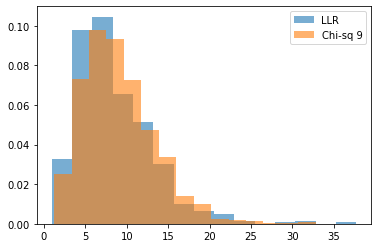

In [11]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=9)
llr_stats = plot_true2(gen_data_ex,setup_test)

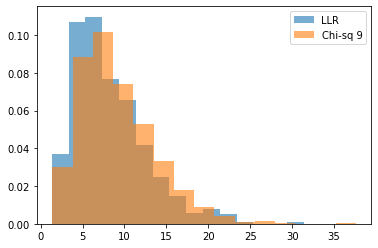

In [12]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=9)
llr_stats = plot_true2(gen_data_ex,setup_test)

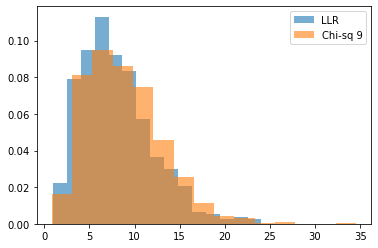

In [13]:
gen_data_ex = lambda : gen_data(nobs=1000, a=1.0, num_params=9)
llr_stats = plot_true2(gen_data_ex,setup_test)

# K = 19

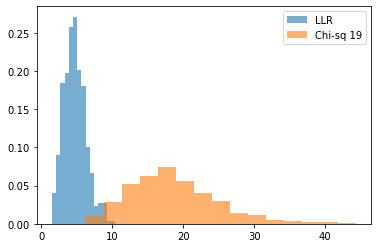

In [14]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.0, num_params=19)
llr_stats = plot_true2(gen_data_ex,setup_test)

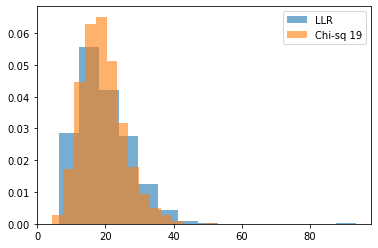

In [15]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.25, num_params=19)
llr_stats = plot_true2(gen_data_ex,setup_test)

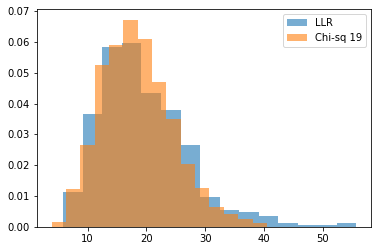

In [16]:
gen_data_ex = lambda : gen_data(nobs=1000, a=0.5, num_params=19)
llr_stats = plot_true2(gen_data_ex,setup_test)

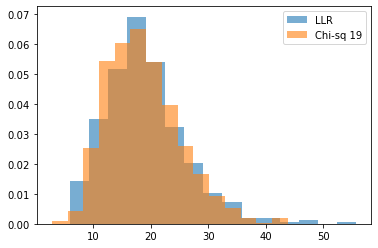

In [17]:
gen_data_ex = lambda : gen_data(nobs=1000, a=1.0, num_params=19)
llr_stats = plot_true2(gen_data_ex,setup_test)